In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np
from sklearn.svm import SVC

In [3]:
def read_points(dataset_name, label_col_number):
    points = []
    labels = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != label_col_number:
                        float_row.append(float(row[i]))
                points.append(float_row)
                labels.append(int(row[label_col_number]))
    return np.array(points), np.array(labels)

In [4]:
points, labels = read_points("../Datasets/blobs2.csv", 2)

In [5]:
def draw_point(x, y, color, size=10):
    plt.scatter(x, y, size, color)

In [6]:
def SVM_classifier(kernel, degree=0):
    clf = SVC(kernel=kernel, degree=degree)
    clf.fit(points, labels)
    for i in range(len(points)):
        draw_point(points[i][0], points[i][1], 'white')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20,
           linewidth=1, color='white', edgecolor='black')
    for i in tqdm_notebook(range(len(points))):
        color = 'hotpink'
        if labels[i] == 1:
            color = 'lime'
        draw_point(points[i][0], points[i][1], color)
    plt.show()

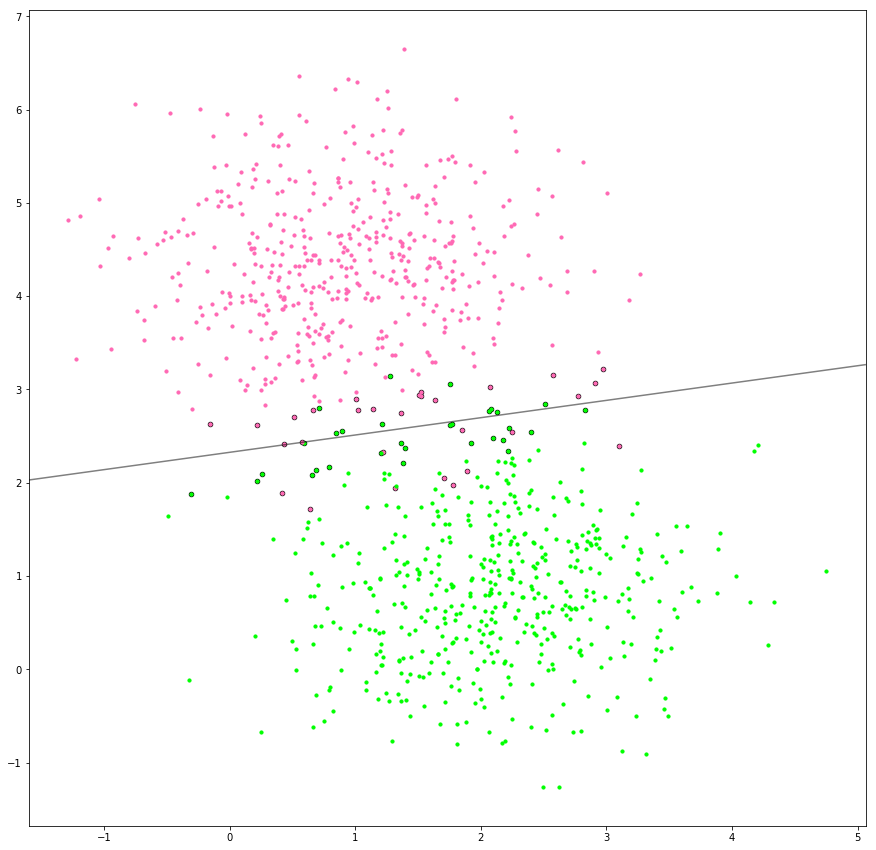

In [7]:
SVM_classifier('linear')

/Users/mari/Documents/ML/hw3/venv/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


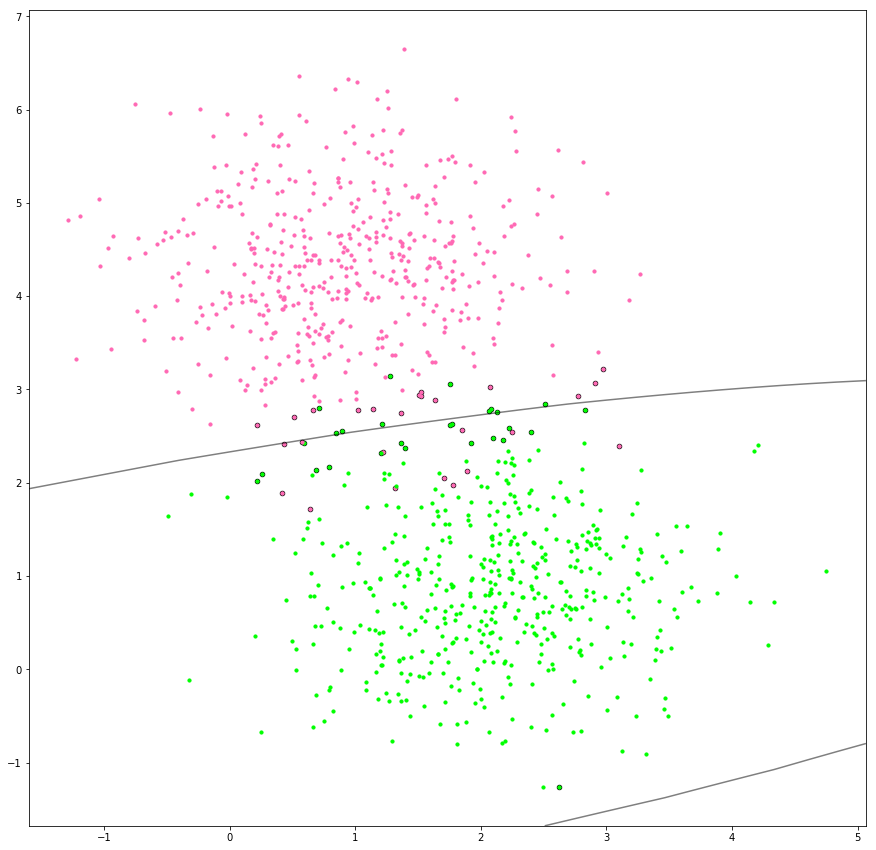

In [8]:
SVM_classifier('poly', 2)

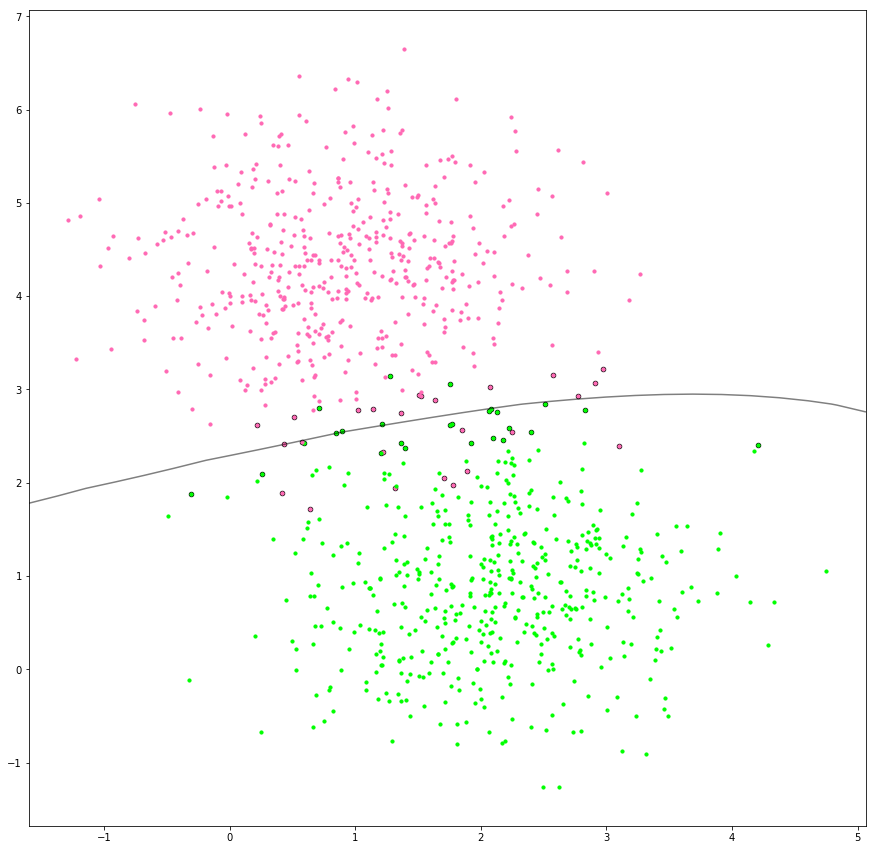

In [9]:
SVM_classifier('poly', 3)

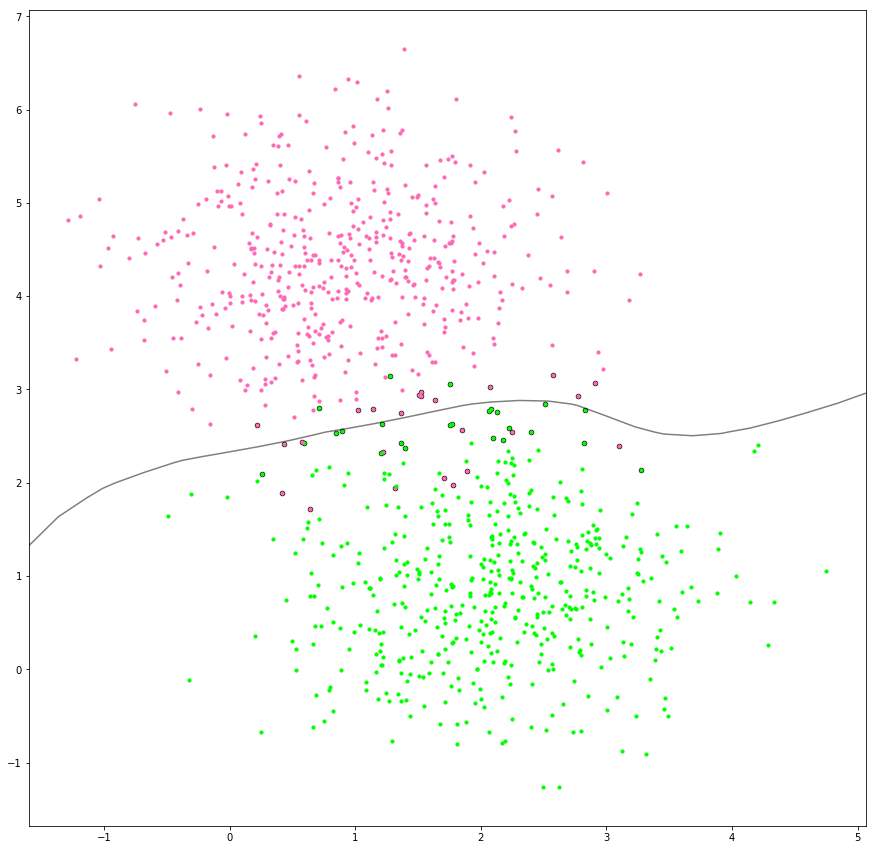

In [10]:
SVM_classifier('poly', 5)

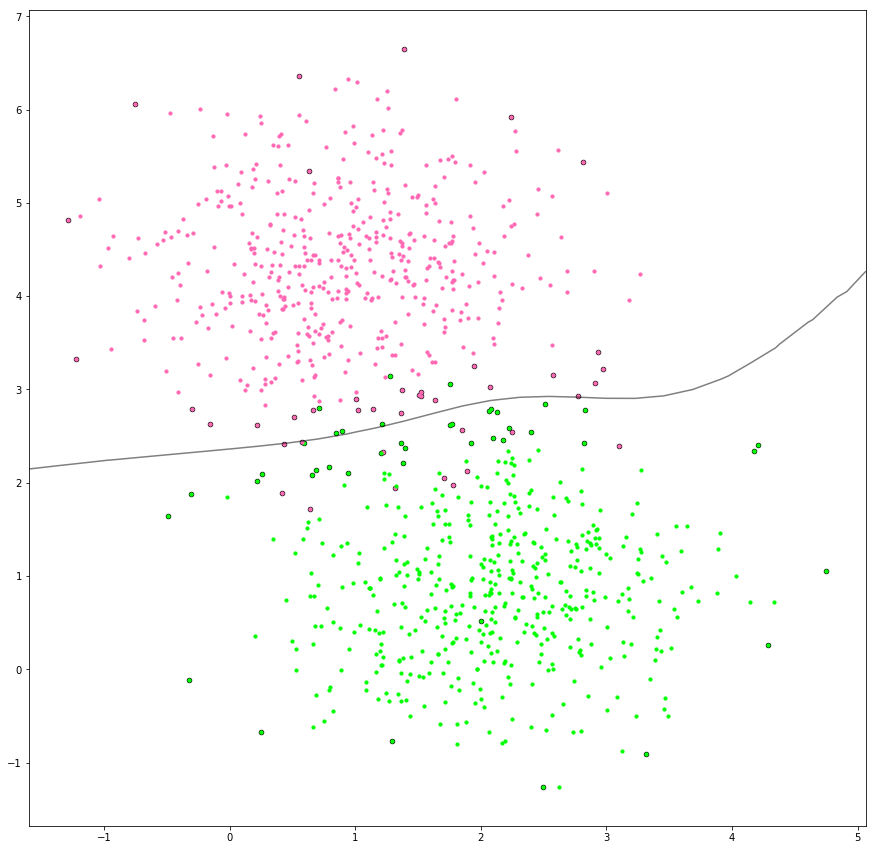

In [11]:
SVM_classifier('rbf')